In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data_baru.csv")

df 

,id,tanggal,co2,no2,co,benzene,toluene,pm25,humidity,temperature,...,new_id,CO2i,NO2i,COi,Benzenei,Toluenei,PM25i,Checks,AQI,AQI_Range
0,1718353318,2024-06-14 08:21:58,410.29,23.12,0.53,0.0,2.58,46.09,70.4,32.1,...,AIR001,20.5145,28.9000,6.022727,0.0,12.90,76.816667,5,77.0,Moderate
1,1718353328,2024-06-14 08:22:08,409.98,22.17,0.55,0.0,2.49,48.58,70.2,32.1,...,AIR001,20.4990,27.7125,6.250000,0.0,12.45,80.966667,5,81.0,Moderate
2,1718353338,2024-06-14 08:22:18,405.24,9.14,0.29,0.0,1.15,18.70,70.0,32.1,...,AIR001,20.2620,11.4250,3.295455,0.0,5.75,31.166667,5,31.0,Good
3,1718353353,2024-06-14 08:22:33,406.01,11.03,0.26,0.0,1.35,9.57,70.0,32.1,...,AIR001,20.3005,13.7875,2.954545,0.0,6.75,15.950000,5,20.0,Good
4,1718353363,2024-06-14 08:22:43,406.01,11.03,0.23,0.0,1.35,14.55,70.5,32.2,...,AIR001,20.3005,13.7875,2.613636,0.0,6.75,24.250000,5,24.0,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7520,1718748622,2024-06-18 22:10:22,409.61,21.03,0.77,0.0,2.38,30.32,88.2,25.6,...,AIR001,20.4805,26.2875,8.750000,0.0,11.90,50.533333,5,51.0,Moderate
7521,1718748637,2024-06-18 22:10:37,410.07,22.44,0.76,0.0,2.52,31.15,88.3,25.6,...,AIR001,20.5035,28.0500,8.636364,0.0,12.60,51.916667,5,52.0,Moderate
7522,1718748647,2024-06-18 22:10:47,410.07,22.44,0.76,0.0,2.52,36.13,88.3,25.6,...,AIR001,20.5035,28.0500,8.636364,0.0,12.60,60.216667,5,60.0,Moderate
7523,1718748657,2024-06-18 22:10:57,410.34,23.28,0.77,0.0,2.60,30.32,88.4,25.6,...,AIR001,20.5170,29.1000,8.750000,0.0,13.00,50.533333,5,51.0,Moderate


In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7525 entries, 0 to 7524
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           7525 non-null   int64  
 1   tanggal      7525 non-null   object 
 2   co2          7525 non-null   float64
 3   no2          7525 non-null   float64
 4   co           7525 non-null   float64
 5   benzene      7525 non-null   float64
 6   toluene      7525 non-null   float64
 7   pm25         7525 non-null   float64
 8   humidity     7525 non-null   float64
 9   temperature  7525 non-null   float64
 10  created_at   7525 non-null   object 
 11  updated_at   7525 non-null   object 
 12  new_id       7525 non-null   object 
 13  CO2i         7525 non-null   float64
 14  NO2i         7525 non-null   float64
 15  COi          7525 non-null   float64
 16  Benzenei     7525 non-null   float64
 17  Toluenei     7525 non-null   float64
 18  PM25i        7525 non-null   float64
 19  Checks

In [392]:
df.isnull().sum()

id               0
tanggal          0
co2              0
no2              0
co               0
benzene          0
toluene          0
pm25             0
humidity         0
temperature      0
created_at       0
updated_at       0
new_id           0
CO2i             0
NO2i             0
COi              0
Benzenei         0
Toluenei         0
PM25i            0
Checks           0
AQI            113
AQI_Range      113
dtype: int64

In [393]:
amean=df["AQI"].mean()
df["AQI"].fillna(amean,inplace=True)

In [394]:
df['AQI_Range'].value_counts()

AQI_Range
Moderate                          5535
Unhealthy for Sensitive Groups     896
Good                               664
Unhealthy                          288
Very Unhealthy                      26
Hazardous                            3
Name: count, dtype: int64

In [395]:
data = df[['co2', 'no2', 'co', 'benzene', 'toluene', 'pm25', 'AQI']]

In [396]:
data.describe() # Melihat info dari nilai numerik

,co2,no2,co,benzene,toluene,pm25,AQI
count,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.00000,7525.000000
mean,405.977827,11.616084,0.668450,0.000004,1.387262,49.48916,88.694819
std,3.170987,7.964575,0.243716,0.000200,0.849167,19.82696,43.208967
min,400.000000,0.180000,0.100000,0.000000,0.040000,0.00000,20.000000
25%,403.540000,5.160000,0.590000,0.000000,0.710000,41.94000,70.000000
50%,405.600000,9.820000,0.630000,0.000000,1.240000,48.58000,82.000000
75%,408.680000,18.210000,0.720000,0.000000,2.100000,56.05000,93.000000
max,427.050000,87.370000,2.110000,0.010000,8.260000,448.68000,553.000000


In [397]:
data.corr()

,co2,no2,co,benzene,toluene,pm25,AQI
co2,1.000000,0.974652,0.408186,0.094111,0.985961,-0.083397,-0.113010
no2,0.974652,1.000000,0.368693,0.124789,0.989302,-0.099678,-0.123753
co,0.408186,0.368693,1.000000,-0.039208,0.388731,-0.193769,-0.144660
benzene,0.094111,0.124789,-0.039208,1.000000,0.110058,-0.003142,0.008461
toluene,0.985961,0.989302,0.388731,0.110058,1.000000,-0.091182,-0.119287
pm25,-0.083397,-0.099678,-0.193769,-0.003142,-0.091182,1.000000,0.909916
AQI,-0.113010,-0.123753,-0.144660,0.008461,-0.119287,0.909916,1.000000


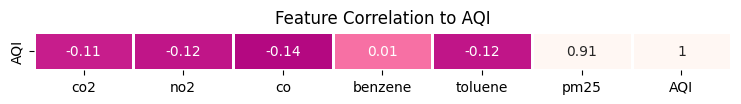

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt
'''Plot Correlation to Target Variable only'''
def corrMat2(data,target='AQI',figsize=(9,0.5),ret_id=False):
    
    corr_mat = data.corr().round(2);shape = corr_mat.shape[0]
    corr_mat = corr_mat.transpose()
    corr = corr_mat.loc[:, data.columns == target].transpose().copy()
    if(ret_id is False):
        f, ax = plt.subplots(figsize=figsize)
        sns.heatmap(corr,vmin=-0.3,vmax=0.3,center=0, 
                     cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
        plt.title(f'Feature Correlation to {target}')
    
    if(ret_id):
        return corr
corrMat2(data)

<Axes: >

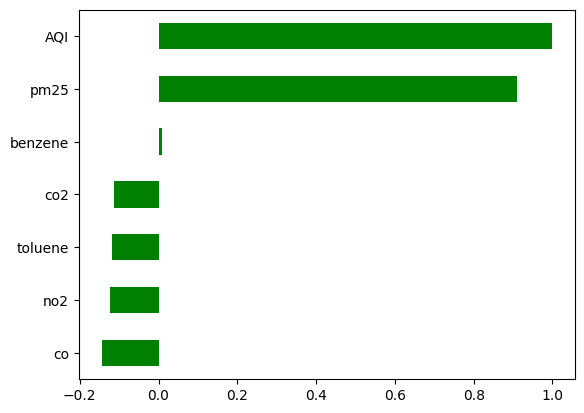

In [399]:
correlation=data.corr()['AQI'].sort_values()
correlation.plot(kind='barh',color='green')

<Axes: >

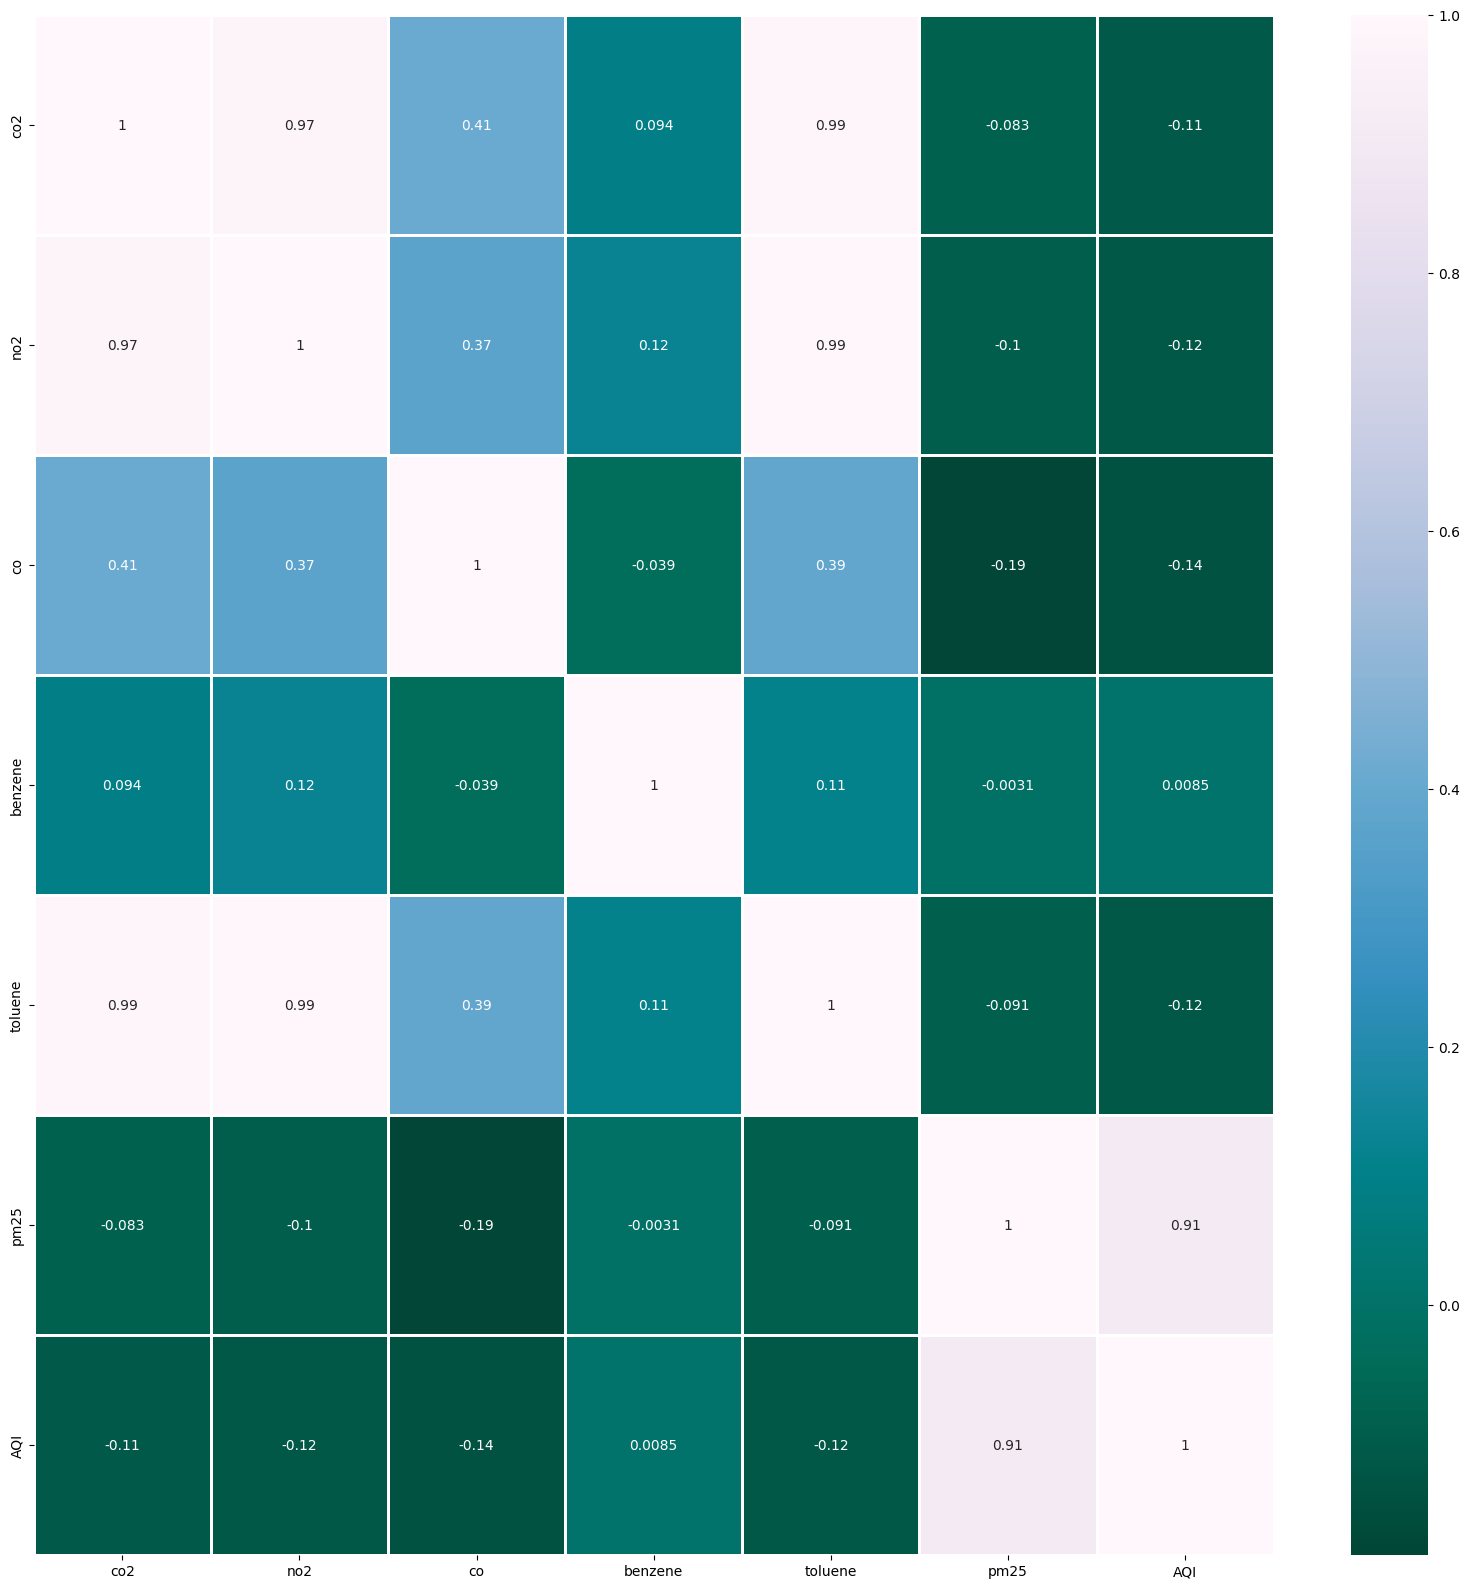

In [400]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),linewidths=1,cmap='PuBuGn_r',annot=True)

In [401]:
X = data.drop("AQI", axis=1)  # Input features
y = data["AQI"]  # Target variable

In [402]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaled = min_max_scaler.fit_transform(X)
min_max_data = pd.DataFrame(min_max_scaled, columns=X.columns)

min_max_data.head()

,co2,no2,co,benzene,toluene,pm25
0,0.380407,0.263104,0.213930,0.0,0.309002,0.102724
1,0.368946,0.252208,0.223881,0.0,0.298054,0.108273
2,0.193715,0.102764,0.094527,0.0,0.135036,0.041678
3,0.222181,0.124441,0.079602,0.0,0.159367,0.021329
4,0.222181,0.124441,0.064677,0.0,0.159367,0.032428


In [403]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
standard_scaled = standard_scaler.fit_transform(X)
standard_data = pd.DataFrame(standard_scaled, columns=X.columns)

standard_data.head()

,co2,no2,co,benzene,toluene,pm25
0,1.359974,1.444481,-0.568119,-0.019971,1.404690,-0.171453
1,1.262206,1.325195,-0.486051,-0.019971,1.298697,-0.045858
2,-0.232696,-0.310908,-1.552938,-0.019971,-0.279425,-1.552997
3,0.010147,-0.073591,-1.676040,-0.019971,-0.043884,-2.013512
4,0.010147,-0.073591,-1.799142,-0.019971,-0.043884,-1.762322


In [404]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(X)
robust_data = pd.DataFrame(robust_scaled, columns=X.columns)

robust_data.head()

,co2,no2,co,benzene,toluene,pm25
0,0.912451,1.019157,-0.769231,0.0,0.964029,-0.176471
1,0.852140,0.946360,-0.615385,0.0,0.899281,0.000000
2,-0.070039,-0.052107,-2.615385,0.0,-0.064748,-2.117647
3,0.079767,0.092720,-2.846154,0.0,0.079137,-2.764706
4,0.079767,0.092720,-3.076923,0.0,0.079137,-2.411765


In [405]:
import numpy as np

log_transformed = np.log1p(X)
log_transformed.head()

,co2,no2,co,benzene,toluene,pm25
0,6.019299,3.183041,0.425268,0.0,1.275363,3.852061
1,6.018545,3.142858,0.438255,0.0,1.249902,3.903588
2,6.006944,2.316488,0.254642,0.0,0.765468,2.980619
3,6.008838,2.487404,0.231112,0.0,0.854415,2.358020
4,6.008838,2.487404,0.207014,0.0,0.854415,2.744061


In [406]:
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
power_transformed = power_transformer.fit_transform(X)
power_data = pd.DataFrame(power_transformed, columns=X.columns)

power_data.head()

,co2,no2,co,benzene,toluene,pm25
0,2.442491e-15,1.323722,-0.532882,-0.019971,1.327906,-0.119147
1,2.303713e-15,1.242693,-0.442751,-0.019971,1.247257,0.008615
2,-3.608225e-16,-0.132096,-1.712719,-0.019971,-0.166088,-1.685004
3,8.326673e-17,0.111255,-1.874802,-0.019971,0.076943,-2.325928
4,8.326673e-17,0.111255,-2.040635,-0.019971,0.076943,-1.963539


In [407]:
decimal_scaled = X / 100
decimal_data = decimal_scaled.round(2)

decimal_data.head()

,co2,no2,co,benzene,toluene,pm25
0,4.10,0.23,0.01,0.0,0.03,0.46
1,4.10,0.22,0.01,0.0,0.02,0.49
2,4.05,0.09,0.00,0.0,0.01,0.19
3,4.06,0.11,0.00,0.0,0.01,0.10
4,4.06,0.11,0.00,0.0,0.01,0.15


In [408]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer

# Define the regression algorithm
regressor = LinearRegression()

# Prepare the scaled datasets
min_max_scaled = min_max_scaler.fit_transform(X)
standard_scaled = standard_scaler.fit_transform(X)
robust_scaled = robust_scaler.fit_transform(X)
log_transformed = np.log1p(X)
power_transformer = PowerTransformer(method='yeo-johnson')
power_transformed = power_transformer.fit_transform(data)
decimal_scaled = X / 100

# Evaluate performance using cross-validation
scores_min_max = cross_val_score(regressor, min_max_scaled, y, cv=5, scoring='neg_mean_squared_error')
scores_standard = cross_val_score(regressor, standard_scaled, y, cv=5, scoring='neg_mean_squared_error')
scores_robust = cross_val_score(regressor, robust_scaled, y, cv=5, scoring='neg_mean_squared_error')
scores_log = cross_val_score(regressor, log_transformed, y, cv=5, scoring='neg_mean_squared_error')
scores_power = cross_val_score(regressor, power_transformed, y, cv=5, scoring='neg_mean_squared_error')
scores_decimal = cross_val_score(regressor, decimal_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean squared error for each scaling method
mse_min_max = -np.mean(scores_min_max)
mse_standard = -np.mean(scores_standard)
mse_robust = -np.mean(scores_robust)
mse_log = -np.mean(scores_log)
mse_power = -np.mean(scores_power)
mse_decimal = -np.mean(scores_decimal)

# Print the mean squared error for each scaling method
print(f"Mean Squared Error (Min-Max Scaling): {mse_min_max}")
print(f"Mean Squared Error (Standardization): {mse_standard}")
print(f"Mean Squared Error (Robust Scaling): {mse_robust}")
print(f"Mean Squared Error (Log Transformation): {mse_log}")
print(f"Mean Squared Error (Power Transformer): {mse_power}")
print(f"Mean Squared Error (Decimal Scaling): {mse_decimal}")

Mean Squared Error (Min-Max Scaling): 519.3001310965002
Mean Squared Error (Standardization): 572.1853352199936
Mean Squared Error (Robust Scaling): 519.3001310965034
Mean Squared Error (Log Transformation): 6073.545220588751
Mean Squared Error (Power Transformer): 788.4514141195863
Mean Squared Error (Decimal Scaling): 519.3001310965066


In [409]:
mse_values = np.array([mse_min_max,mse_standard,mse_robust,mse_log,mse_power,mse_decimal])

# Get the index of the minimum MSE
min_mse_index = np.argmin(mse_values)

# List of scaling methods
scaling_methods = ['Min-Max Scaling', 'Standardization', 'Robust Scaling',
                   'Log Transformation', 'Power Transformer', 'Decimal Scaling']

selected_method = scaling_methods[min_mse_index]
selected_method

'Min-Max Scaling'

In [410]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [411]:
# Apply the selected scaling method to the training and testing sets
if selected_method == 'Min-Max Scaling':
    scaler = MinMaxScaler()
elif selected_method == 'Standardization':
    scaler = StandardScaler()
elif selected_method == 'Robust Scaling':
    scaler = RobustScaler()
elif selected_method == 'Log Transformation':
    scaler = None  # No scaling required for log transformation
elif selected_method == 'Power Transformer':
    scaler = PowerTransformer(method='yeo-johnson')
elif selected_method == 'Decimal Scaling':
    scaler = None  # No scaling required for decimal scaling

if scaler is not None:
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
else:
    X_train_scaled = X_train
    X_test_scaled = X_test

In [436]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR

# Create an array of regression models
models = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    LinearRegression(),
]

In [437]:
from sklearn.metrics import mean_squared_error

# Train and evaluate each model
for model in models:
    model.fit(X_train_scaled, y_train)  # Train the model
    y_pred = model.predict(X_test_scaled)  # Make predictions

    mse = mean_squared_error(y_test, y_pred)  # Calculate mean squared error
    print(f"{model.__class__.__name__}, MSE: {mse}")

DecisionTreeRegressor, MSE: 1.2119601328903655
RandomForestRegressor, MSE: 0.837427639746617
KNeighborsRegressor, MSE: 44.24954134659136
LinearRegression, MSE: 304.46012466280825


In [438]:
# Select the best model based on the minimum MSE
best_model_default = models[np.argmin([mean_squared_error(y_test, model.predict(X_test_scaled)) for model in models])]
best_model_default

RandomForestRegressor()

In [440]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions using the best model
y_pred = best_model_default.predict(X_test_scaled)

# Evaluate the model using various metrics
mse_default = mean_squared_error(y_test, y_pred)
mae_default = mean_absolute_error(y_test, y_pred)
r2_default = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"Mean Squared Error: {mse_default}")
print(f"Mean Absolute Error: {mae_default}")
print(f"R2 Score: {r2_default}")

Mean Squared Error: 0.837427639746617
Mean Absolute Error: 0.04472886923064807
R2 Score: 0.9994924372411804


In [445]:
# Create an array of regression models with their respective parameter grids
models = [
    (DecisionTreeRegressor(), {'max_depth': [None, 3, 5], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}),
    (RandomForestRegressor(), {'n_estimators': [100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4],}),
    (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'leaf_size': [30, 40, 50]}),
     (LinearRegression(), {'fit_intercept': [True, False], 'copy_X': [True, False], 'n_jobs': [None, -1], 'positive': [True, False]}),

]

In [446]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Create lists to store the model names, default parameters, best parameters, and MSE values
model_names = []
default_params_list = []
best_params_list = []
mse_values = []

# Perform grid search with cross-validation to find the best model and parameters
for i, (model, param_grid) in enumerate(models):
    model_name = model.__class__.__name__
    print(f"Performing grid search for model: {model_name} ({i+1}/{len(models)})")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train_scaled, y_train)

    mse = -grid_search.best_score_

    # Store the model name, default parameters, best parameters, and MSE values
    default_params = {} if hasattr(model, "get_params") else None
    best_params = grid_search.best_params_

    model_names.append(model_name)
    default_params_list.append(default_params)
    best_params_list.append(best_params)
    mse_values.append(mse)

Performing grid search for model: DecisionTreeRegressor (1/4)
Performing grid search for model: RandomForestRegressor (2/4)
Performing grid search for model: KNeighborsRegressor (3/4)
Performing grid search for model: LinearRegression (4/4)


In [447]:
# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Default Parameters': default_params_list,
    'Best Parameters': best_params_list,
    'MSE': mse_values
})

# Sort the DataFrame by MSE in ascending order
results_df.sort_values('MSE', inplace=True)

# Create a color-coding function to highlight the lowest MSE in green
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: lightgreen' if v else '' for v in is_min]

# Apply the highlight function to the MSE column
results_df = results_df.style.apply(highlight_min, subset=['MSE'])
results_df

,Model,Default Parameters,Best Parameters,MSE
0,DecisionTreeRegressor,{},"{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}",2.078571
1,RandomForestRegressor,{},"{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}",4.352838
2,KNeighborsRegressor,{},"{'algorithm': 'auto', 'leaf_size': 40, 'n_neighbors': 3, 'weights': 'distance'}",38.329027
3,LinearRegression,{},"{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}",318.167808


In [419]:
pip install nbformat 4.2.0

ERROR: Could not find a version that satisfies the requirement 4.2.0 (from versions: none)
ERROR: No matching distribution found for 4.2.0


In [449]:
models = [
    (DecisionTreeRegressor(**best_params_list[0]), {}),
    (RandomForestRegressor(**best_params_list[1]), {}),
    (KNeighborsRegressor(**best_params_list[2]), {}),
    (LinearRegression(**best_params_list[3]), {}),

   

]

In [450]:
# Train and evaluate the models
model_names = []
mse_values = []
mae_values = []
r2_values = []

for i, (model, _) in enumerate(models):
    model_name = model.__class__.__name__
    print(f"Training and evaluating model: {model_name} ({i+1}/{len(models)})")

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    model_names.append(model_name)
    mse_values.append(mse)
    mae_values.append(mae)
    r2_values.append(r2)

Training and evaluating model: DecisionTreeRegressor (1/4)
Training and evaluating model: RandomForestRegressor (2/4)
Training and evaluating model: KNeighborsRegressor (3/4)
Training and evaluating model: LinearRegression (4/4)


In [451]:
# Create a DataFrame to store the evaluation results
evaluation_df = pd.DataFrame({
    'Model': model_names,
    'MSE': mse_values,
    'MAE': mae_values,
    'R2 Score': r2_values
})

# Print the evaluation results
evaluation_df.sort_values('MSE')

,Model,MSE,MAE,R2 Score
1,RandomForestRegressor,0.889741,0.046583,0.999461
0,DecisionTreeRegressor,1.206645,0.043854,0.999269
2,KNeighborsRegressor,40.151594,2.026253,0.975664
3,LinearRegression,304.460125,9.086188,0.815467


In [452]:
best_model = pipeline
best_model.fit(X_train_scaled, y_train)

# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model using various regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2 Score: {r2}")
# Calculate RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")


MSE: 0.4220946509627169
MAE: 0.12969042051944737
R2 Score: 0.9997441695074807
RMSE: 0.6496881182249811


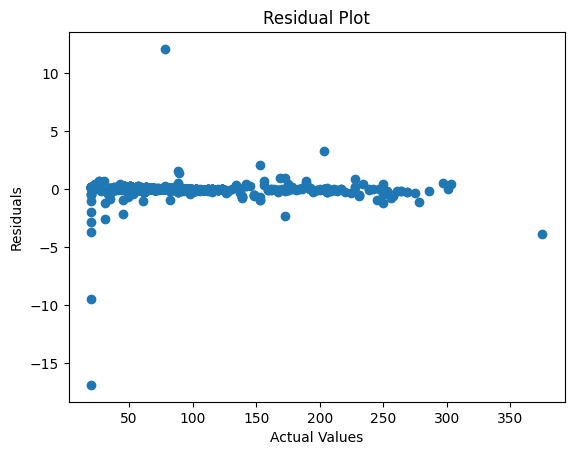

Predicted                           Baik  Berbahaya  Sangat Tidak Sehat  \
Actual                                                                    
Baik                                   0          0                   0   
Sedang                                21          2                   6   
Tidak Sehat                            0          0                   1   
Tidak Sehat bagi Kelompok Sensitif     4          0                   1   
All                                   25          2                   8   

Predicted                           Sedang  Tidak Sehat  \
Actual                                                    
Baik                                     2            0   
Sedang                                 216            9   
Tidak Sehat                              1            0   
Tidak Sehat bagi Kelompok Sensitif      25            0   
All                                    244            9   

Predicted                           Tidak Sehat bagi Kelompo

In [456]:
# Analyze residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Evaluate by AQI categories
categories = ['Baik', 'Sedang', 'Tidak Sehat bagi Kelompok Sensitif', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya']
category_thresholds = [50, 100, 150, 200, 300, 500]

def categorize_aqi(aqi):
    for i, threshold in enumerate(category_thresholds):
        if aqi <= threshold:
            return categories[i]
    return categories[-1]

y_test_cat = y_test.apply(categorize_aqi)
y_pred_cat = pd.Series(y_pred).apply(categorize_aqi)

confusion_matrix = pd.crosstab(y_test_cat, y_pred_cat, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion_matrix)

In [457]:
# Save the best model
best_model_index = evaluation_df['MSE'].idxmin()
best_model = models[best_model_index][0]

best_model

RandomForestRegressor()

In [458]:
print(mse_default,mse)

0.837427639746617 0.4220946509627169


In [428]:
 #import joblib

 # Saving the Best Model
 #if mse_default < mse:
 #    print(best_model_default)
 #    joblib.dump(best_model_default, "AQI_model.pkl")
 #else:
 #    print(best_model)
 #    joblib.dump(best_model, "AQI_model.pkl")

######################################################################################################################

Random Forest Model
Mean Absolute Error: 0.046454416202157
Mean Squared Error: 0.8478574028402872
R2 Score: 0.9994861157883427
The accuracy of our model is 100.0%

Decision Tree Model
Mean Absolute Error: 0.0451827242524919
Mean Squared Error: 1.2119601328903655
R2 Score: 0.9992654340513344
The accuracy of our model is 100.0%

KNN Model
Mean Absolute Error: 0.29694007921069004
Mean Squared Error: 4.042829359854833
R2 Score: 0.9975496514254703
The accuracy of our model is 100.0%

Linear Regression Model
Mean Absolute Error: 9.086187729633544
Mean Squared Error: 304.46012466280854
R2 Score: 0.8154674941572513
The accuracy of our model is 82.0%



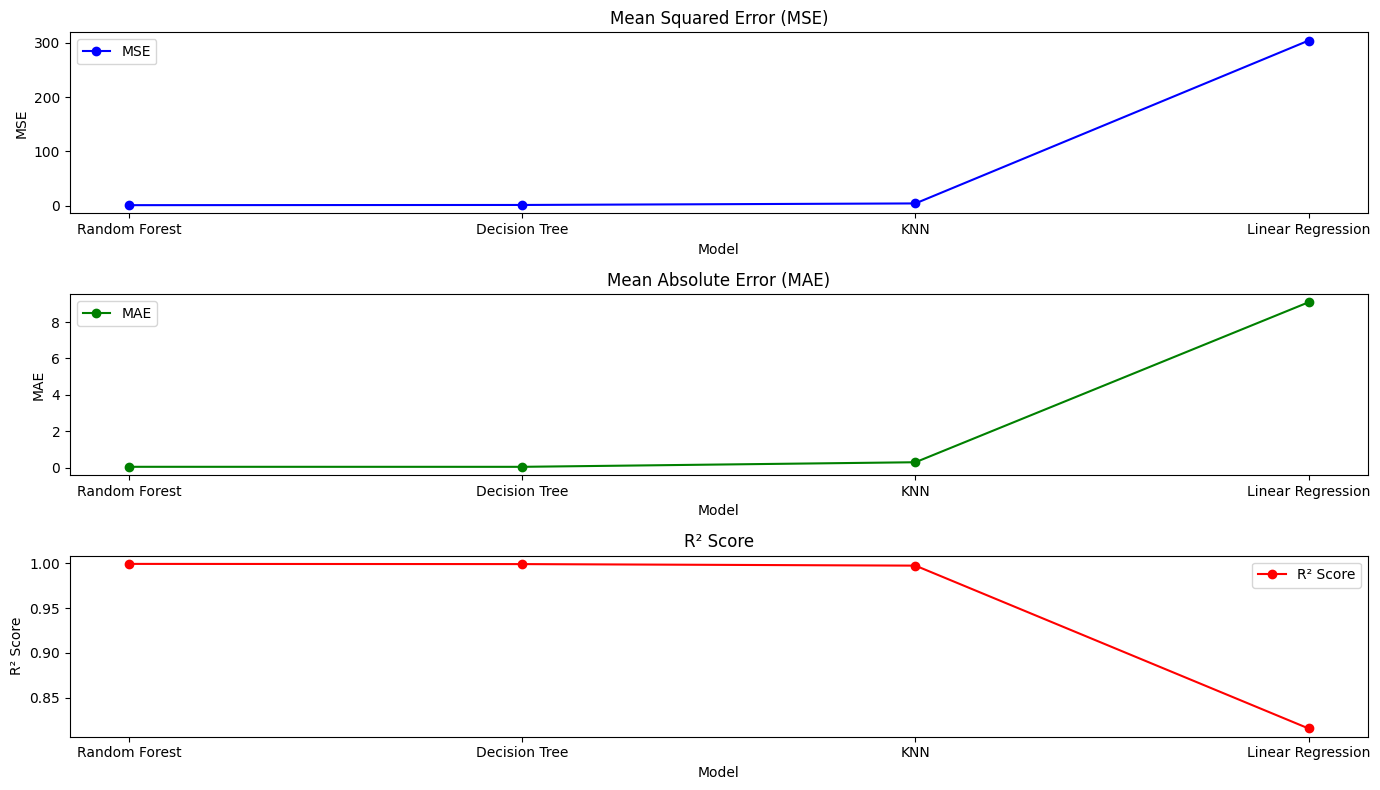

In [461]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train and predict with each model
models = {
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Linear Regression': LinearRegression()
}

mae_values = {}
mse_values = {}
r2_values = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae_values[model_name] = mean_absolute_error(y_test, y_pred)
    mse_values[model_name] = mean_squared_error(y_test, y_pred)
    r2_values[model_name] = r2_score(y_test, y_pred)

    print(f"{model_name} Model")
    print("Mean Absolute Error:", mae_values[model_name])
    print("Mean Squared Error:", mse_values[model_name])
    print("R2 Score:", r2_values[model_name])
    print("The accuracy of our model is {}%\n".format(round(r2_values[model_name], 2) * 100))

# Plotting the metrics
epochs = list(models.keys())

plt.figure(figsize=(14, 8))

# Plot MSE
plt.subplot(3, 1, 1)
plt.plot(epochs, list(mse_values.values()), 'o-', label='MSE', color='blue')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('Mean Squared Error (MSE)')
plt.legend()

# Plot MAE
plt.subplot(3, 1, 2)
plt.plot(epochs, list(mae_values.values()), 'o-', label='MAE', color='green')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE)')
plt.legend()

# Plot R² Score
plt.subplot(3, 1, 3)
plt.plot(epochs, list(r2_values.values()), 'o-', label='R² Score', color='red')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.title('R² Score')
plt.legend()

plt.tight_layout()
plt.show()